# Lecture 2: Temporal Stability

In [1]:
%matplotlib inline 
# plots graphs within the notebook
%config InlineBackend.figure_format='svg' # not sure what this does, may be default images to svg format

from IPython.display import Image

from IPython.core.display import HTML
def header(text):
    raw_html = '<h4>' + str(text) + '</h4>'
    return raw_html

def box(text):
    raw_html = '<div style="border:1px dotted black;padding:2em;">'+str(text)+'</div>'
    return HTML(raw_html)

def nobox(text):
    raw_html = '<p>'+str(text)+'</p>'
    return HTML(raw_html)

def addContent(raw_html):
    global htmlContent
    htmlContent += raw_html
    
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 18,
        }



<h1>Time-Dependent Simulation</h1>

Consider the pure advection equation,
$$
\frac{\partial \phi}{\partial t}+u\frac{\partial \phi}{\partial x} =0
$$
with a given set of initial and boundary conditions and assuming $u$ is constant. For simplicity, we rewrite this equation as
$$
\frac{\partial \phi}{\partial t}=f(\phi)
$$
To solve this equation in time and space, a time integration is necessary:
$$
\int_{n\Delta t}^{(n+1)\Delta t}\phi dt = \int_{n\Delta t}^{(n+1)\Delta t}f dt
$$
which reduces to 
$$
\phi(x,(n+1)\Delta t)=\phi(x,n\Delta t)+(\Delta t)f(\phi(x,(n+?)\Delta t))
$$
Here the function $f$ is assumed to vary very little over an interval $\Delta t$. The question however is at what time $f$ could or should be evaluated. Thinking from an initial boundary condition perspective, it seems simpler to estimate $f$ at time $n\Delta t$. Hereafter $\phi(i+1/2)\Delta x,n\Delta t)=\phi_i^n$.

<h2>Explicit Time Stepping</h2>

When the RHS of a transport equation is estimated at $n\Delta t$, the time stepping method is called <b>explicit</b>. The simplest scheme is the Euler forward scheme
<p class='alert alert-danger'>
$$
\phi_i^{n+1}=\phi_i^n+\Delta t.f_i^n
$$</p>
The Runge Kutta schemes are more accurate but involved multiple steps, here is the second-order scheme:
<p class='alert alert-danger'>
\begin{eqnarray}
\phi_i^{n+1/2} &=& \phi_i^n+\frac{\Delta t}{2}\left(f_i^n\right)\\
\phi_i^{n+1} &=& \phi_i^n+\Delta t\left(f_i^{n+1/2}\right)
\end{eqnarray}
</p>
and the fourth order scheme:
<p class='alert alert-danger'>
\begin{eqnarray}
\tilde{\phi}_i^{n+1/2} &=& \phi_i^n+\frac{\Delta t}{2}\left(f_i^n\right)\\
\hat{\phi}_i^{n+1/2} &=& \phi_i^n+\Delta t\left(\tilde{f}_i^{n+1/2}\right)\\
\tilde{\phi}_i^{n+1} &=& \phi_i^n+\Delta t\left(\hat{f}_i^{n+1/2}\right)\\
\phi_i^{n+1} &=& \phi_i^n+\frac{\Delta t}{6}\left[f_i^n+2\tilde{f}_i^{n+1/2}+2\hat{f}_i^{n+1/2}+\tilde{f}_i^{n+1}\right]
\end{eqnarray}
</p>
The following code simulates the pure advection equation for an impulse boundary condition:
$$\phi(x,t=0)=\begin{cases}
\frac{1}{2}+\frac{1}{2}\cos\left(x-\frac{L}{2}\right)&,\text{ for }\left\vert x-\frac{L}{2}\right\vert\leq\pi\\
0&,\text{ for }\left\vert x-\frac{L}{2}\right\vert>\pi
\end{cases}
$$
over a domain of length $L_x$ and with the following boundary conditions:
\begin{eqnarray}
\phi_{-1/2} &=& 0\\
\left.\frac{\partial \phi}{\partial x}\right\vert_{Nx-1/2} &=& 0\\
\end{eqnarray}

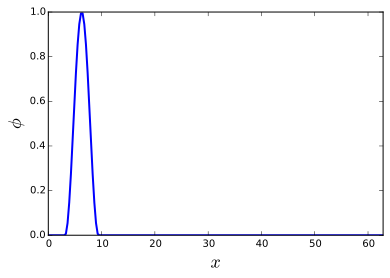

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy.utilities.lambdify import lambdify

def wave(x_phi,N,xo):
    phi = np.zeros(N)
    phi = (1.0+np.cos(x_phi-xo))/2.
    xmask = np.where(np.abs(x_phi-xo) > np.pi)
    phi[xmask] = 0.
    return phi

Lx = 20.*np.pi
Nx = 200
dx = Lx/Nx
xini = 2.*np.pi

x_phi = np.linspace(dx/2.,Lx-dx/2.,Nx,dtype='float64')
phi =np.zeros(Nx,dtype='float64')
phi = wave(x_phi,Nx,xini)
plt.plot(x_phi,phi,lw=2)
plt.xlabel('$x$', fontdict = font)
plt.ylabel('$\phi$', fontdict = font)
plt.xlim(0,Lx)
plt.show()

There are two different schemes coded for the spatial derivatives (<FONT FACE="courier" style="color:blue">compute_rhs_1</FONT> and <FONT FACE="courier" style="color:blue">compute_rhs_2</FONT>). Try both of them for various time steps.

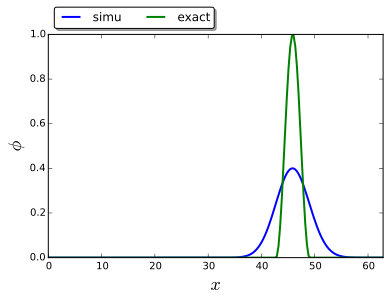

In [4]:
from IPython.display import clear_output
Lx = 20.*np.pi
Nx = 200
dx = Lx/Nx
Simulation_time = 40.
Tplot = 1.0
dt =0.1
xini = 2.*np.pi
x_phi = np.linspace(dx/2.,Lx-dx/2.,Nx,dtype='float64')
RHS = np.zeros(Nx,dtype='float64')
phi = np.zeros(Nx,dtype='float64')
phi_exact = np.zeros(Nx,dtype='float64')
phi = wave(x_phi,Nx,xini)
u = 1.
def compute_rhs_2(u,phi,N):
    r = np.zeros(Nx,dtype='float64')
    r[1:Nx-1] = (phi[2:Nx] - phi[0:Nx-2])/(2.*dx)
    r[0] = 0.
    r[Nx-1] = 0.
    r *= u
    return r
def compute_rhs_1(u,phi,N):
    r = np.zeros(Nx,dtype='float64')
    r[1:Nx] = (phi[1:Nx] - phi[0:Nx-1])/dx
    r[0] = 0.
    r[Nx-1] = 0.
    r *= u
    return r
T = 0.
Tp = 0.
while T < Simulation_time:
    #print(T)
    RHS = compute_rhs_1(u,phi,Nx)
    phi += -dt*RHS
    T += dt
    Tp += dt
    if (Tp >= Tplot):
        plt.plot(x_phi,phi,lw=2,label='simu')
        xt = xini + T*u
        phi_exact = wave(x_phi,Nx,xt)
        plt.plot(x_phi,phi_exact,lw=2,label='exact')
        plt.xlabel('$x$', fontdict = font)
        plt.ylabel('$\phi$', fontdict = font)
        plt.xlim(0,Lx)
        plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
        plt.show()
        clear_output(wait=True)
        Tp = 0.

<h2> Implicit Time Stepping Methods</h2>
Another approach is to estimate the RHS term at $(n+1)\Delta t$, yielding the backward Euler scheme:
<p class='alert alert-danger'>
$$
\phi_i^{n+1}=\phi_i^n+\Delta t.f_i^{n+1}
$$</p>
or the Crank-Nicolson scheme:
<p class='alert alert-danger'>
$$
\phi_i^{n+1}=\phi_i^n+\frac{\Delta t}{2}.\left(f_i^{n+1}+f_i^{n}\right)
$$</p>
These methods require to form and invert matrices, which is more costly than the explicit method, however, as explained in the lecture, they are more stable. In the following, codes are provided for the backward Euler and Crank Nicolson schemes for the previous system.


Using a central scheme for the velocity derivatives leads to the following system of equations for the Backward Euler scheme:
\begin{eqnarray}
\phi_0^{n+1} &=& \phi_0^n -\frac{u\Delta t}{\Delta x}\left(\frac{\phi_{1}^{n+1}+\phi_0^{n+!}}{2}-\phi_{-\frac{1}{2}}\right)\\
\phi_i^{n+1} &=& \phi_i^n -\frac{u\Delta t}{\Delta x}\left(\frac{\phi_{i+1}^{n+1}+\phi_i^{n+1}}{2}-\frac{\phi_i^{n+1}+\phi_{i-1}^{n+1}}{2}\right)\\
\phi_{N_x-1}^{n+1} &=& \phi_{N_x-1}^n -\frac{u\Delta t}{\Delta x}\left(\phi_{N_x-1}^{n+1}-\phi_{N_x-2}^{n+1}\right)
\end{eqnarray}

To form our matrix, the system needs to be recast as:
\begin{eqnarray}
\left(1-\frac{u\Delta t}{2\Delta x}\right)\phi_0^{n+1}+\frac{u\Delta t}{2\Delta x}\phi_{1}^{n+1} &=& \phi_0^n+\frac{u\Delta t}{\Delta x}\phi_{-\frac{1}{2}}\\
-\frac{u\Delta t}{2\Delta x}\phi_{i-1}^{n+1}+\phi_i^{n+1}+\frac{u\Delta t}{2\Delta x}\phi_{i+1}^{n+1} &=& \phi_i^n\\
-\frac{u\Delta t}{\Delta x}\phi_{N_x-2}^{n+1}+\left(1+\frac{u\Delta t}{\Delta x}\right)\phi_{N_x-1}^{n+1} &=& \phi_{N_x-1}^n
\end{eqnarray}
The matrix is defined in the function <FONT FACE="courier" style="color:blue"><FONT FACE="courier" style="color:blue">build_matrix</FONT></FONT>.

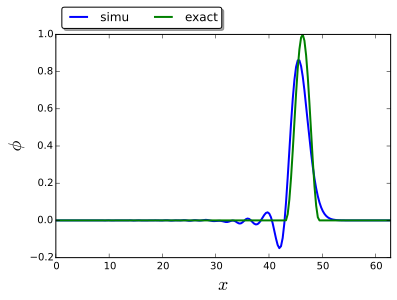

In [5]:
def build_matrix(nx,dt,dx,u):
    A = np.zeros((nx,nx),dtype='float64')
    for i in range (1,nx-1):
            im = i - 1
            ip = i + 1
            A[i, i] = 1. 
            A[i, im] = -u*dt/(2.*dx)
            A[i, ip] = u*dt/(2.*dx)
            A[0, 0] = 1.-u*dt/(2.*dx)
            A[0, 1] = u*dt/(2.*dx)
            A[nx-1, nx-2] = -u*dt/dx
            A[nx-1, nx-1] = 1+u*dt/dx
    return A
            
from IPython.display import clear_output
Lx = 20.*np.pi
Nx = 200
dx = Lx/Nx
Simulation_time = 40.
Tplot = 1.0
dt =0.01
xini = 2.*np.pi
phi_bc_0 = 0.
x_phi = np.linspace(dx/2.,Lx-dx/2.,Nx,dtype='float64')
RHS = np.zeros(Nx,dtype='float64')
phi = np.zeros(Nx,dtype='float64')
phi_old = np.zeros(Nx,dtype='float64')
phi_exact = np.zeros(Nx,dtype='float64')
A = np.zeros((Nx,Nx),dtype='float64')
b = np.zeros(Nx,dtype='float64')
phi = wave(x_phi,Nx,xini)
u = 1.
A = build_matrix(Nx,dt,dx,u)
T = 0.
Tp = 0.
while T < Simulation_time:
    #print(T)
    b = phi
    b[0] += u*dt/dx*phi_bc_0
    phi = np.linalg.solve(A, b)
    T += dt
    Tp += dt
    if (Tp >= Tplot):
        plt.plot(x_phi,phi,lw=2,label='simu')
        xt = xini + T*u
        phi_exact = wave(x_phi,Nx,xt)
        plt.plot(x_phi,phi_exact,lw=2,label='exact')
        plt.xlabel('$x$', fontdict = font)
        plt.ylabel('$\phi$', fontdict = font)
        plt.xlim(0,Lx)
        plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
        plt.show()
        clear_output(wait=True)
        Tp = 0.            


To remove the issues of dispersion arising from the spatial derivative, we switch to the following system:
$$
\frac{\partial \phi}{\partial t}+u\frac{\partial \phi}{\partial x}=0
$$
$$
\phi(x,t=0)=\sin(x)
$$
$$
\phi(x=0,t)=\sin(-ut)
$$
$$
\left.\frac{\partial\phi}{\partial x}\right\vert_{x=L_x}=0
$$
The first code uses Backward Euler.

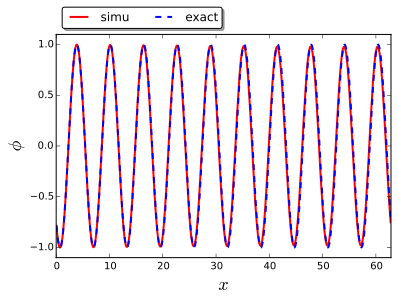

In [50]:
def build_matrix(nx,dt,dx,u):
    A = np.zeros((nx,nx),dtype='float64')
    for i in range (1,nx-1):
            im = i - 1
            ip = i + 1
            A[i, i] = 1. 
            A[i, im] = -u*dt/(2.*dx)
            A[i, ip] = u*dt/(2.*dx)
            A[0, 0] = 1.+u*dt/(2.*dx)
            A[0, 1] = u*dt/(2.*dx)
            A[nx-1, nx-2] = -u*dt/dx
            A[nx-1, nx-1] = 1+u*dt/dx
    return A
x,u,t = sp.symbols('x u t')
wave_exact = sp.sin(x-u*t)
phi_wave = lambdify((x,u,t),wave_exact)
from IPython.display import clear_output
Lx = 20.*np.pi
Nx = 512
dx = Lx/Nx
Simulation_time = 40.
Tplot = 1.0
dt =0.001
phi_bc_0 = 0.
x_phi = np.linspace(dx/2.,Lx-dx/2.,Nx,dtype='float64')
RHS = np.zeros(Nx,dtype='float64')
phi = np.zeros(Nx,dtype='float64')
phi_old = np.zeros(Nx,dtype='float64')
phi_exact = np.zeros(Nx,dtype='float64')
A = np.zeros((Nx,Nx),dtype='float64')
b = np.zeros(Nx,dtype='float64')
phi = np.array([phi_wave(x,u,0.) for x in x_phi], dtype = 'float64')
u = 1.
A = build_matrix(Nx,dt,dx,u)
T = 0.
Tp = 0.
while T < Simulation_time:
    #print(T)
    T += dt
    b = phi
    b[0] += u*dt/dx*phi_wave(0.,u,T)
    phi = np.linalg.solve(A, b)
    Tp += dt
    if (Tp >= Tplot):
        plt.plot(x_phi,phi,'r-',lw=2,label='simu')
        phi_exact = np.array([phi_wave(x,u,T) for x in x_phi], dtype = 'float64')
        plt.plot(x_phi,phi_exact,'b--',lw=2,label='exact')
        plt.xlabel('$x$', fontdict = font)
        plt.ylabel('$\phi$', fontdict = font)
        plt.xlim(0,Lx)
        plt.ylim(-1.1,1.1)
        plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
        plt.show()
        clear_output(wait=True)
        Tp = 0.            


We now test the Crank Nicolson scheme:
\begin{eqnarray}
\phi_0^{n+1} &=& \phi_0^n -\frac{u\Delta t}{2\Delta x}\left(\left(\frac{\phi_{1}^{n+1}+\phi_0^{n+1}}{2}-\phi_{-\frac{1}{2}}^{n+1}\right)+\left(\frac{\phi_{1}^{n}+\phi_0^{n}}{2}-\phi_{-\frac{1}{2}}^{n}\right)\right)\\
\phi_i^{n+1} &=& \phi_i^n -\frac{u\Delta t}{2\Delta x}\left(\left(\frac{\phi_{i+1}^{n+1}+\phi_i^{n+1}}{2}-\frac{\phi_i^{n+1}+\phi_{i-1}^{n+1}}{2}\right)+\left(\frac{\phi_{i+1}^{n}+\phi_i^{n}}{2}-\frac{\phi_i^{n}+\phi_{i-1}^{n}}{2}\right)\right)\\
\phi_{N_x-1}^{n+1} &=& \phi_{N_x-1}^n -\frac{u\Delta t}{2\Delta x}\left(\left(\phi_{N_x-1}^{n+1}-\phi_{N_x-2}^{n+1}\right)+\left(\phi_{N_x-1}^{n}-\phi_{N_x-2}^{n}\right)\right)
\end{eqnarray}

and in matrix form:
\begin{eqnarray}
\left(1+\frac{u\Delta t}{4\Delta x}\right)\phi_0^{n+1}+\frac{u\Delta t}{4\Delta x}\phi_{1}^{n+1} &=& \phi_0^n+\frac{u\Delta t}{2\Delta x}\phi^{n+1}_{-\frac{1}{2}}-\frac{u\Delta t}{2\Delta x}\left(\frac{\phi_{1}^{n}+\phi_0^{n}}{2}-\phi_{-\frac{1}{2}}^{n}\right)\\
-\frac{u\Delta t}{4\Delta x}\phi_{i-1}^{n+1}+\phi_i^{n+1}+\frac{u\Delta t}{4\Delta x}\phi_{i+1}^{n+1} &=& \phi_i^n-\frac{u\Delta t}{2\Delta x}\left(\frac{\phi_{i+1}^{n}+\phi_i^{n}}{2}-\frac{\phi_i^{n}+\phi_{i-1}^{n}}{2}\right)\\
-\frac{u\Delta t}{2\Delta x}\phi_{N_x-2}^{n+1}+\left(1+\frac{u\Delta t}{2\Delta x}\right)\phi_{N_x-1}^{n+1} &=& \phi_{N_x-1}^n-\frac{u\Delta t}{2\Delta x}\left(\phi_{N_x-1}^{n}-\phi_{N_x-2}^{n}\right)
\end{eqnarray}

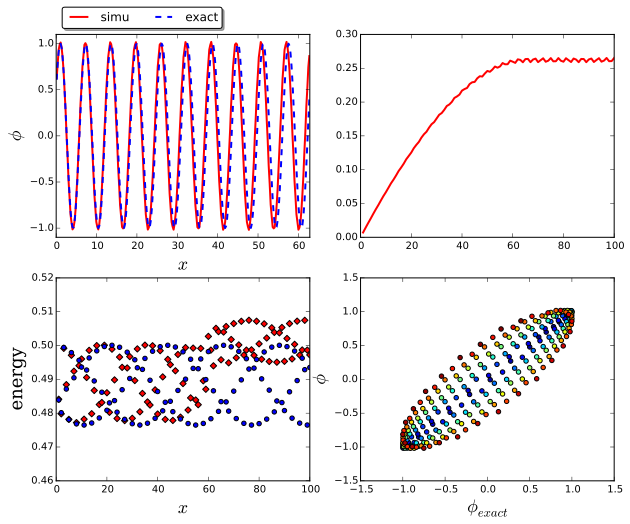

In [5]:
def build_matrix(nx,dt,dx,u):
    A = np.zeros((nx,nx),dtype='float64')
    for i in range (1,nx-1):
            im = i - 1
            ip = i + 1
            A[i, i] = 1. 
            A[i, im] = -u*dt/(4.*dx)
            A[i, ip] = u*dt/(4.*dx)
            A[0, 0] = 1.+u*dt/(4.*dx)
            A[0, 1] = u*dt/(4.*dx)
            A[nx-1, nx-2] = -u*dt/(2.*dx)
            A[nx-1, nx-1] = 1+u*dt/(2.*dx)
    return A
x,u,t = sp.symbols('x u t')
wave_exact = sp.sin(x-u*t)
phi_wave = lambdify((x,u,t),wave_exact)
from IPython.display import clear_output
Lx = 20.*np.pi
Nx = 256
dx = Lx/Nx
Simulation_time = 100.
dt =0.01
Tplot = 1.0
Nplot = Simulation_time/Tplot
error = np.zeros(Nplot,dtype = 'float64')
energy = np.zeros(Nplot,dtype = 'float64')
energy_exact = np.zeros(Nplot,dtype = 'float64')
Time_plot = np.linspace(Tplot,Simulation_time,Nplot)

Nt = T/dt
phi_bc_0 = 0.
x_phi = np.linspace(dx/2.,Lx-dx/2.,Nx,dtype='float64')
RHS = np.zeros(Nx,dtype='float64')
phi = np.zeros(Nx,dtype='float64')
phi_old = np.zeros(Nx,dtype='float64')
phi_exact = np.zeros(Nx,dtype='float64')
A = np.zeros((Nx,Nx),dtype='float64')
b = np.zeros(Nx,dtype='float64')
phi = np.array([phi_wave(x,u,0.) for x in x_phi], dtype = 'float64')
u = 1.
A = build_matrix(Nx,dt,dx,u)
T = 0.
Tp = 0.
ip = 0
emask = np.where(np.abs(x_phi-(Lx-2.*np.pi)) <= np.pi )

while T < Simulation_time:
    #print(T)
    T += dt
    b = phi
    b[0] += u*dt/(2.*dx)*phi_wave(0.,u,T) - u*dt/(2.*dx)*((phi[0]+phi[1])/2.-phi_wave(0.,u,T-dt))
    b[1:Nx-1] -= u*dt/(4.*dx)*(phi[2:Nx]-phi[0:Nx-2])
    b[Nx-1] -= u*dt/(2.*dx)*(phi[Nx-1]-phi[Nx-2])
    phi = np.linalg.solve(A, b)
    Tp += dt
    if (Tp >= Tplot):
        plt.figure(figsize=(10, 8), dpi=160, facecolor='w', edgecolor='k')
        plt.subplot(2,2,1)
        plt.plot(x_phi,phi,'r-',lw=2,label='simu')
        phi_exact = np.array([phi_wave(x,u,T) for x in x_phi], dtype = 'float64')
        plt.plot(x_phi,phi_exact,'b--',lw=2,label='exact')
        plt.xlabel('$x$', fontdict = font)
        plt.ylabel('$\phi$', fontdict = font)
        plt.xlim(0,Lx)
        plt.ylim(-1.1,1.1)
        plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
        error[ip] =np.sqrt(np.sum(np.power(phi-phi_exact,2))/Nx)
        Time_plot[ip] = T
        energy[ip] = np.sum(np.power(phi[emask],2)*dx)/(2.*np.pi)
        energy_exact[ip] = np.sum(np.power(phi_exact[emask],2)*dx)/(2.*np.pi)
        plt.subplot(2,2,2)
        plt.plot(Time_plot[0:ip+1],error[0:ip+1],'r-',lw=2)
        plt.xlim(0,Simulation_time)
        plt.subplot(2,2,3)
        #plt.plot(x_phi,phi-phi_exact,'r-',lw=2,label='simu')
        plt.scatter(Time_plot[0:ip+1],energy[0:ip+1],marker='D',c='red',label='simu')
        plt.scatter(Time_plot[0:ip+1],energy_exact[0:ip+1],marker='o',c='blue',label='exact')
        plt.xlabel('$x$', fontdict = font)
        plt.ylabel('energy', fontdict = font)
        plt.xlim(0,Simulation_time)
        #plt.legend(loc=3, bbox_to_anchor=[0, 1],
        #   ncol=3, shadow=True, fancybox=True)
        #plt.xlim(0,Lx)
        #plt.ylim(-1.1,1.1)
        plt.subplot(2,2,4)
        Nt = T/dt
        colors = x_phi
        plt.scatter(phi_exact,phi,c=colors)
        plt.xlabel('$\phi_{exact}$', fontdict = font)
        plt.ylabel('$\phi$', fontdict = font)
        plt.show()
        clear_output(wait=True)
        
        Tp = 0. 
        ip +=1


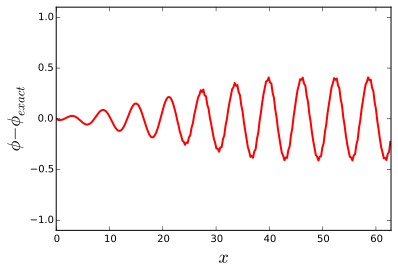

In [67]:
plt.plot(x_phi,phi-phi_exact,'r-',lw=2,label='simu')
plt.xlabel('$x$', fontdict = font)
plt.ylabel('$\phi-\phi_{exact}$', fontdict = font)
plt.xlim(0,Lx)
plt.ylim(-1.1,1.1)
#plt.legend(loc=3, bbox_to_anchor=[0, 1],
#           ncol=3, shadow=True, fancybox=True)
plt.show()

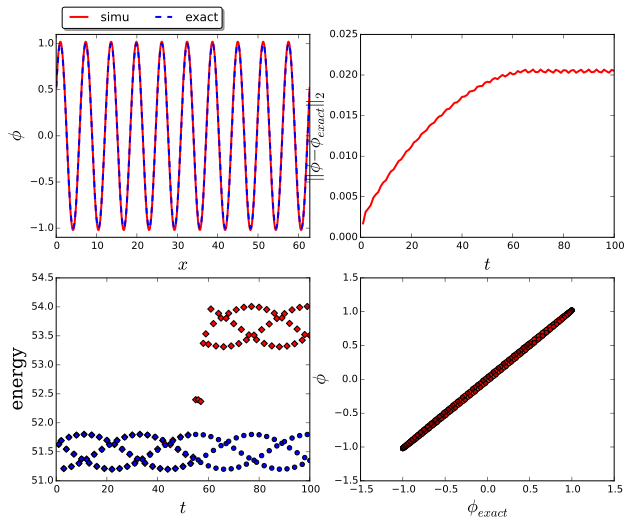

In [8]:
plt.figure(figsize=(10, 8), dpi=160, facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
plt.plot(x_phi,phi,'r-',lw=2,label='simu')
phi_exact = np.array([phi_wave(x,u,T) for x in x_phi], dtype = 'float64')
plt.plot(x_phi,phi_exact,'b--',lw=2,label='exact')
plt.xlabel('$x$', fontdict = font)
plt.ylabel('$\phi$', fontdict = font)
plt.xlim(0,Lx)
plt.ylim(-1.1,1.1)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
plt.subplot(2,2,2)
plt.plot(Time_plot,error,'r-',lw=2)
plt.xlim(0,Simulation_time)
plt.xlabel('$t$', fontdict = font)
plt.ylabel('$\Vert\phi-\phi_{exact}\Vert_2$', fontdict = font)
plt.xlim(0,Simulation_time)
plt.subplot(2,2,3)
        #plt.plot(x_phi,phi-phi_exact,'r-',lw=2,label='simu')
plt.scatter(Time_plot,energy,marker='D',c='red',label='simu')
plt.scatter(Time_plot,energy_exact,marker='o',c='blue',label='exact')
plt.xlabel('$t$', fontdict = font)
plt.ylabel('energy', fontdict = font)
plt.xlim(0,Simulation_time)
#plt.legend(loc=3, bbox_to_anchor=[0, 1],
#           ncol=3, shadow=True, fancybox=True)
#plt.xlim(0,Lx)
#plt.ylim(-1.1,1.1)
plt.subplot(2,2,4)
colors = x_phi
plt.scatter(phi_exact,phi,c=colors)
plt.xlabel('$\phi_{exact}$', fontdict = font)
plt.ylabel('$\phi$', fontdict = font)
plt.savefig('figures/Lecture2-CK-CS2-1024-dt-01.pdf', bbox_inches='tight')
plt.show()

In [99]:
PDF('figures/Lecture2-CK-CS2-512-dt-001.pdf',size=(800,600))

Crank Nicolson with upwind scheme for the spatial derivative.

\begin{eqnarray}
\phi_0^{n+1} &=& \phi_0^n -\frac{u\Delta t}{2\Delta x}\left(\left(\phi_0^{n+1}-\phi_{-1}^{n+1}\right)+\left(\phi_0^{n}-\phi_{-1}^{n}\right)\right)\\
\phi_i^{n+1} &=& \phi_i^n -\frac{u\Delta t}{2\Delta x}\left(\left(\phi_i^{n+1}-\phi_{i-1}^{n+1}\right)+\left(\phi_i^{n}-\phi_{i-1}^{n}\right)\right)\\
\phi_{N_x-1}^{n+1} &=& \phi_{N_x-1}^n -\frac{u\Delta t}{2\Delta x}\left(\left(\phi_{N_x-1}^{n+1}-\phi_{N_x-2}^{n+1}\right)+\left(\phi_{N_x-1}^{n}-\phi_{N_x-2}^{n}\right)\right)
\end{eqnarray}

\begin{eqnarray}
\left(1+\frac{u\Delta t}{2\Delta x}\right)\phi_0^{n+1} &=& \phi_0^n+\frac{u\Delta t}{2\Delta x}\phi^{n+1}_{-1}-\frac{u\Delta t}{2\Delta x}\left(\phi_0^{n}-\phi_{-1}^{n}\right)\\
-\frac{u\Delta t}{2\Delta x}\phi_{i-1}^{n+1}+\left(1+\frac{u\Delta t}{2\Delta x}\right)\phi_i^{n+1} &=& \phi_i^n-\frac{u\Delta t}{2\Delta x}\left(\phi_i^{n}-\phi_{i-1}^{n}\right)\\
-\frac{u\Delta t}{2\Delta x}\phi_{N_x-2}^{n+1}+\left(1+\frac{u\Delta t}{2\Delta x}\right)\phi_{N_x-1}^{n+1} &=& \phi_{N_x-1}^n-\frac{u\Delta t}{2\Delta x}\left(\phi_{N_x-1}^{n}-\phi_{N_x-2}^{n}\right)
\end{eqnarray}

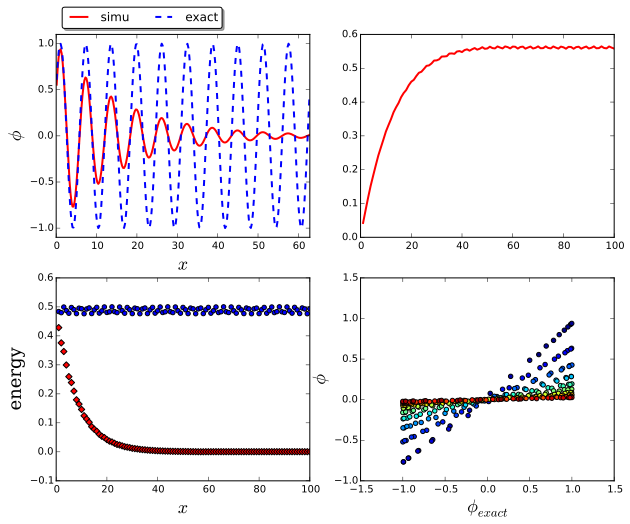

In [6]:
def build_matrix_1(nx,dt,dx,u):
    A = np.zeros((nx,nx),dtype='float64')
    for i in range (1,nx-1):
            im = i - 1
            ip = i + 1
            A[i, i] = 1.+u*dt/(2.*dx) 
            A[i, im] = -u*dt/(2.*dx)
            A[i, ip] = 0.
            A[0, 0] = 1.+u*dt/(2.*dx)
            A[0, 1] = 0.
            A[nx-1, nx-2] = -u*dt/(2.*dx)
            A[nx-1, nx-1] = 1+u*dt/(2.*dx)
    return A
x,u,t = sp.symbols('x u t')
wave_exact = sp.sin(x-u*t)
phi_wave = lambdify((x,u,t),wave_exact)
from IPython.display import clear_output
Lx = 20.*np.pi
Nx = 256
dx = Lx/Nx
Simulation_time = 100.
dt =0.01
Tplot = 1.0
Nplot = Simulation_time/Tplot
error = np.zeros(Nplot,dtype = 'float64')
energy = np.zeros(Nplot,dtype = 'float64')
energy_exact = np.zeros(Nplot,dtype = 'float64')
Time_plot = np.linspace(Tplot,Simulation_time,Nplot)

Nt = T/dt
phi_bc_0 = 0.
x_phi = np.linspace(dx/2.,Lx-dx/2.,Nx,dtype='float64')
RHS = np.zeros(Nx,dtype='float64')
phi = np.zeros(Nx,dtype='float64')
phi_old = np.zeros(Nx,dtype='float64')
phi_exact = np.zeros(Nx,dtype='float64')
A = np.zeros((Nx,Nx),dtype='float64')
b = np.zeros(Nx,dtype='float64')
phi = np.array([phi_wave(x,u,0.) for x in x_phi], dtype = 'float64')
u = 1.
A = build_matrix_1(Nx,dt,dx,u)
T = 0.
Tp = 0.
ip = 0
emask = np.where(np.abs(x_phi-(Lx-2.*np.pi)) <= np.pi )

while T < Simulation_time:
    #print(T)
    T += dt
    b = phi
    b[0] += u*dt/(2.*dx)*phi_wave(-dx/2.,u,T) - u*dt/(2.*dx)*((phi[0]+phi[1])/2.-phi_wave(-dx/2.,u,T-dt))
    b[1:Nx-1] -= u*dt/(4.*dx)*(phi[2:Nx]-phi[0:Nx-2])
    b[Nx-1] -= u*dt/(2.*dx)*(phi[Nx-1]-phi[Nx-2])
    phi = np.linalg.solve(A, b)
    Tp += dt
    if (Tp >= Tplot):
        plt.figure(figsize=(10, 8), dpi=160, facecolor='w', edgecolor='k')
        plt.subplot(2,2,1)
        plt.plot(x_phi,phi,'r-',lw=2,label='simu')
        phi_exact = np.array([phi_wave(x,u,T) for x in x_phi], dtype = 'float64')
        plt.plot(x_phi,phi_exact,'b--',lw=2,label='exact')
        plt.xlabel('$x$', fontdict = font)
        plt.ylabel('$\phi$', fontdict = font)
        plt.xlim(0,Lx)
        plt.ylim(-1.1,1.1)
        plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
        error[ip] =np.sqrt(np.sum(np.power(phi-phi_exact,2))/Nx)
        Time_plot[ip] = T
        energy[ip] = np.sum(np.power(phi[emask],2)*dx)/(2.*np.pi)
        energy_exact[ip] = np.sum(np.power(phi_exact[emask],2)*dx)/(2.*np.pi)
        plt.subplot(2,2,2)
        plt.plot(Time_plot[0:ip+1],error[0:ip+1],'r-',lw=2)
        plt.xlim(0,Simulation_time)
        plt.subplot(2,2,3)
        #plt.plot(x_phi,phi-phi_exact,'r-',lw=2,label='simu')
        plt.scatter(Time_plot[0:ip+1],energy[0:ip+1],marker='D',c='red',label='simu')
        plt.scatter(Time_plot[0:ip+1],energy_exact[0:ip+1],marker='o',c='blue',label='exact')
        plt.xlabel('$x$', fontdict = font)
        plt.ylabel('energy', fontdict = font)
        plt.xlim(0,Simulation_time)
        #plt.legend(loc=3, bbox_to_anchor=[0, 1],
        #   ncol=3, shadow=True, fancybox=True)
        #plt.xlim(0,Lx)
        #plt.ylim(-1.1,1.1)
        plt.subplot(2,2,4)
        Nt = T/dt
        colors = x_phi
        plt.scatter(phi_exact,phi,c=colors)
        plt.xlabel('$\phi_{exact}$', fontdict = font)
        plt.ylabel('$\phi$', fontdict = font)
        plt.show()
        clear_output(wait=True)
        
        Tp = 0. 
        ip +=1


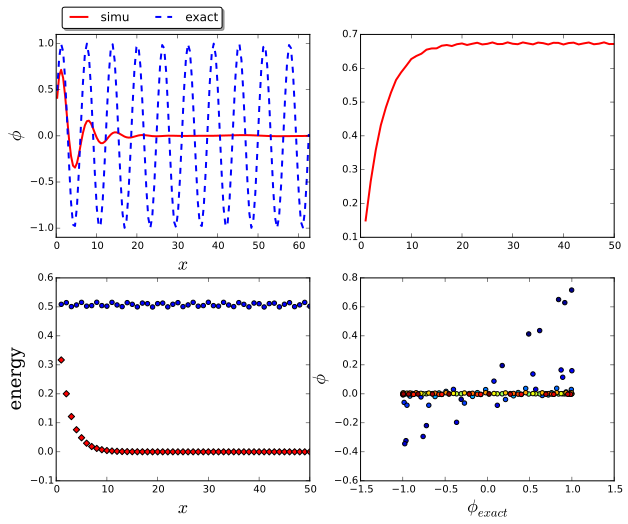

In [15]:

x,u,t = sp.symbols('x u t')
wave_exact = sp.sin(x-u*t)
phi_wave = lambdify((x,u,t),wave_exact)
from IPython.display import clear_output
Lx = 20.*np.pi
Nx = 128
dx = Lx/Nx
Simulation_time = 50.
dt =0.01
Tplot = 1.0
Nplot = Simulation_time/Tplot
error = np.zeros(Nplot,dtype = 'float64')
energy = np.zeros(Nplot,dtype = 'float64')
energy_exact = np.zeros(Nplot,dtype = 'float64')
Time_plot = np.linspace(Tplot,Simulation_time,Nplot)

Nt = T/dt
phi_bc_0 = 0.
x_phi = np.linspace(dx/2.,Lx-dx/2.,Nx,dtype='float64')
RHS = np.zeros(Nx,dtype='float64')
phi = np.zeros(Nx,dtype='float64')
phi_old = np.zeros(Nx,dtype='float64')
phi_exact = np.zeros(Nx,dtype='float64')
phi = np.array([phi_wave(x,u,0.) for x in x_phi], dtype = 'float64')
u = 1.
T = 0.
Tp = 0.
ip = 0
emask = np.where(np.abs(x_phi-(Lx-2.*np.pi)) <= np.pi )

while T < Simulation_time:
    #print(T)
    T += dt
    RHS[1:Nx] = -u*(phi[1:Nx]-phi[0:Nx-1])/dx
    RHS[0] = -u*(phi[0]-phi_wave(-dx/2.,u,T-dt))/dx
    phi = phi + dt*RHS
    Tp += dt
    if (Tp >= Tplot):
        plt.figure(figsize=(10, 8), dpi=160, facecolor='w', edgecolor='k')
        plt.subplot(2,2,1)
        plt.plot(x_phi,phi,'r-',lw=2,label='simu')
        phi_exact = np.array([phi_wave(x,u,T) for x in x_phi], dtype = 'float64')
        plt.plot(x_phi,phi_exact,'b--',lw=2,label='exact')
        plt.xlabel('$x$', fontdict = font)
        plt.ylabel('$\phi$', fontdict = font)
        plt.xlim(0,Lx)
        plt.ylim(-1.1,1.1)
        plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, fancybox=True)
        error[ip] =np.sqrt(np.sum(np.power(phi-phi_exact,2))/Nx)
        Time_plot[ip] = T
        energy[ip] = np.sum(np.power(phi[emask],2)*dx)/(2.*np.pi)
        energy_exact[ip] = np.sum(np.power(phi_exact[emask],2)*dx)/(2.*np.pi)
        plt.subplot(2,2,2)
        plt.plot(Time_plot[0:ip+1],error[0:ip+1],'r-',lw=2)
        plt.xlim(0,Simulation_time)
        plt.subplot(2,2,3)
        #plt.plot(x_phi,phi-phi_exact,'r-',lw=2,label='simu')
        plt.scatter(Time_plot[0:ip+1],energy[0:ip+1],marker='D',c='red',label='simu')
        plt.scatter(Time_plot[0:ip+1],energy_exact[0:ip+1],marker='o',c='blue',label='exact')
        plt.xlabel('$x$', fontdict = font)
        plt.ylabel('energy', fontdict = font)
        plt.xlim(0,Simulation_time)
        #plt.legend(loc=3, bbox_to_anchor=[0, 1],
        #   ncol=3, shadow=True, fancybox=True)
        #plt.xlim(0,Lx)
        #plt.ylim(-1.1,1.1)
        plt.subplot(2,2,4)
        Nt = T/dt
        colors = x_phi
        plt.scatter(phi_exact,phi,c=colors)
        plt.xlabel('$\phi_{exact}$', fontdict = font)
        plt.ylabel('$\phi$', fontdict = font)
        plt.show()
        clear_output(wait=True)
        
        Tp = 0. 
        ip +=1
